# 22M0033     Rishi Raj

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r"C:\Users\MOHIT PRAJAPAT\Desktop\ME 793\assignment\element_data.csv")

In [2]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


# Linear Regression based model where electronegativity is X and boiling point is Y .

In [3]:
# The following codes extract 'Electronegativity' and 'Thermal conductivity' fron the imported dataframe converts it 
# into numpy array and reshapes it to a column vector to be compatible with 'LinearRegression().fit' function.
from sklearn.linear_model import LinearRegression
x=df['en_ghosh'].to_numpy().reshape((-1,1))
y=df['boiling_point'].to_numpy().reshape((-1,1))

In [4]:
# The following code fits y and x using linear fit.
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

In [5]:
# The following code calculates 'Coefficient of determination' for the model
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.1310780884978492


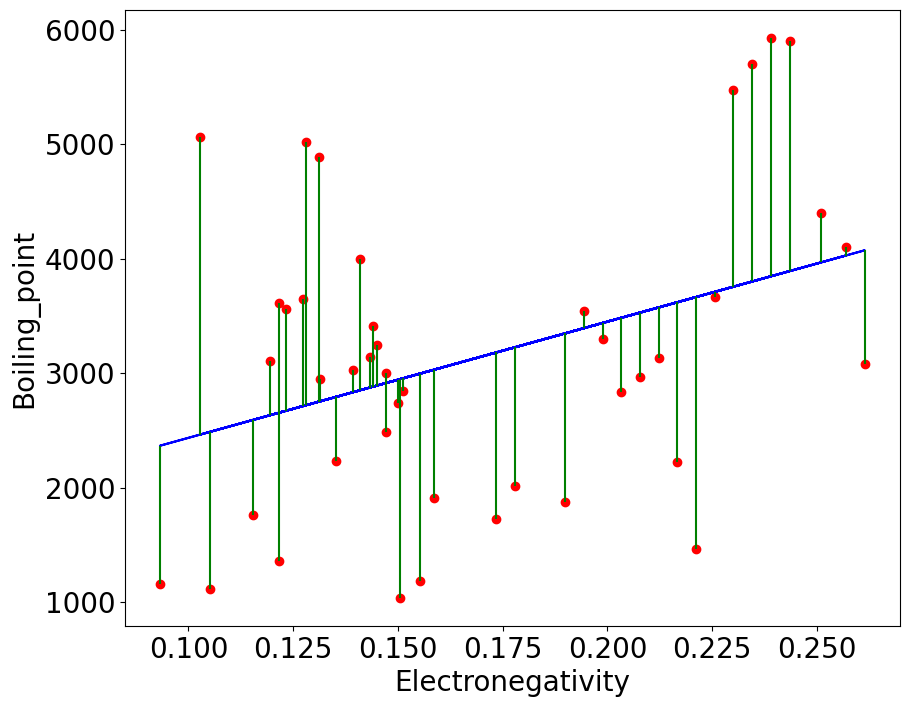

In [6]:
# Plot x, y, y_pred
plt.figure(figsize=(10, 8))
plt.plot(x,y_pred,color='blue')
plt.xlabel("Electronegativity",fontsize=20)
plt.ylabel("Boiling_point",fontsize=20)
plt.scatter(x,y,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.scatter(x,y+dy)
plt.vlines(x,y,y_pred,color='green')
plt.show()

# coefficient of determination is 0.131 which is too low.

# 2.

In [7]:
x1_2=df[['en_ghosh','density_of_solid']].to_numpy().reshape((-1,2))

In [8]:
y1_2=df['youngs_modulus'].to_numpy().reshape((-1,1))

In [9]:
model1_2 = LinearRegression().fit(x1_2, y1_2)
r_sq1_2 = model1_2.score(x1_2, y1_2)
print('coefficient of determination:', r_sq1_2)
print('intercept:', model1_2.intercept_)
print('slope:', model1_2.coef_)


coefficient of determination: 0.39518433506715567
intercept: [122.14364564]
slope: [[-9.78693359e+02  1.91502633e-02]]


In [10]:
y_pred1_2 = model1_2.predict(x1_2)
coefficient_of_determination=r_sq
intercept=model1_2.intercept_
slope=model1_2.coef_

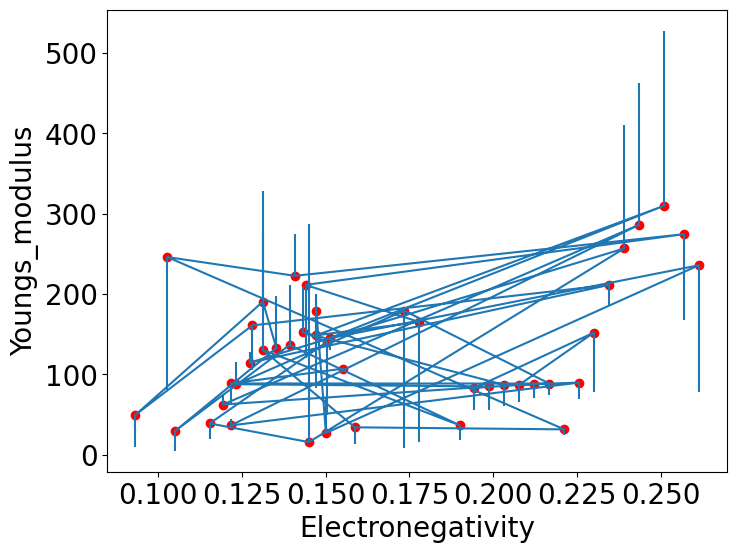

In [11]:
#the following block of code plots electronegativity vs youngs modulus with error as vertical offset from the best fit line
plt.figure(figsize=(8, 6))
plt.plot(x1_2[:,0].reshape(-1,1),y_pred1_2)
plt.xlabel("Electronegativity",fontsize=20)
plt.ylabel("Youngs_modulus",fontsize=20)
plt.scatter(x1_2[:,0].reshape(-1,1),y_pred1_2,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x1_2[:,0].reshape(-1,1),y1_2,y_pred1_2)
plt.show()

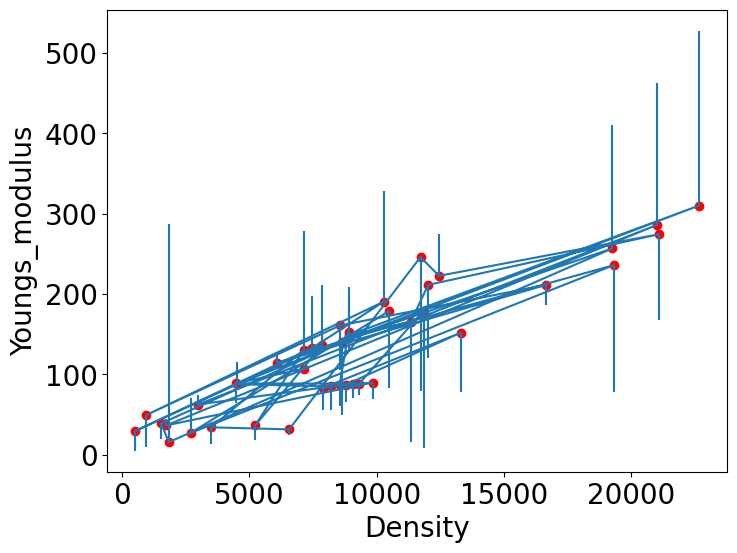

In [12]:
#the following block of code plots density vs youngs modulus with error as vertical offset from the best fit line
plt.figure(figsize=(8, 6))
plt.plot(x1_2[:,1].reshape(-1,1),y_pred1_2)
plt.xlabel("Density",fontsize=20)
plt.ylabel("Youngs_modulus",fontsize=20)
plt.scatter(x1_2[:,1].reshape(-1,1),y_pred1_2,color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.vlines(x1_2[:,1].reshape(-1,1),y1_2,y_pred1_2)
plt.show()


# 2. MultiLinear Regression based model where electronegativity is X1 and density is X2 and Young’s modulus is Y

Text(0.5, 0.98, '$R^2 = 0.40$')

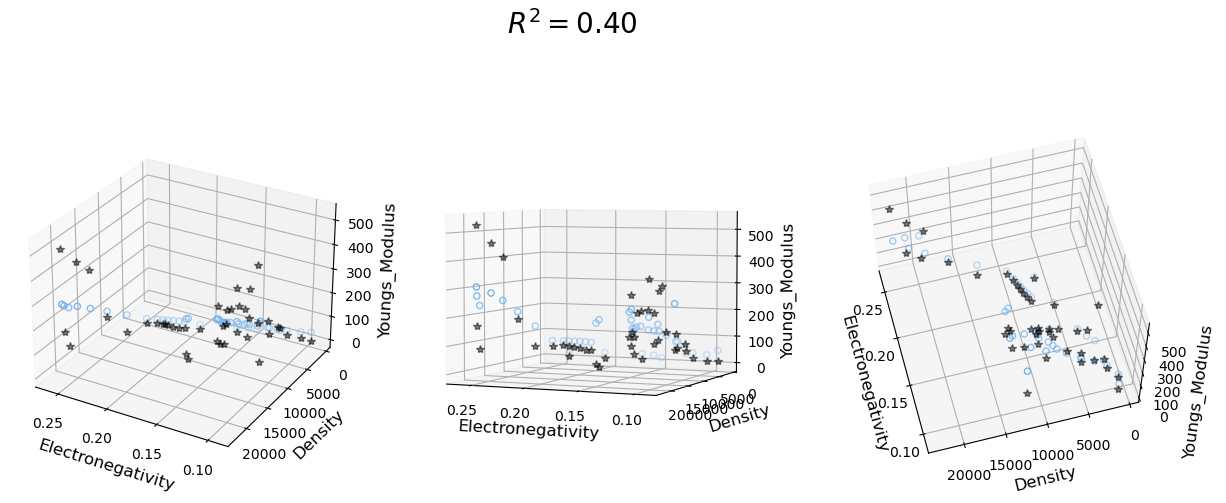

In [13]:
#https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

#Preparing model data point for visualization

x = x1_2[:,0]
y = x1_2[:,1]
z = y1_2.reshape(-1)
# r2 = model.score(x1_2.reshape(-1,2), y1_2)
plt.style.use('default')
# the following code blocks is for surfce plot
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='*', alpha=0.5)
    ax.scatter(x1_2[:,0], x1_2[:,1], y_pred1_2, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Electronegativity', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_zlabel('Youngs_Modulus', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r_sq1_2, fontsize=20)


# In the given plot above blue circles are predicted value and black stars are actual value.

# 3.


In [14]:
# FUNCTION FOR MEAN SQUARED ERROR LOSS
def  cal_cost(X,y,theta):
    cost = (1/len(y)) * np.sum(np.square(X.dot(theta)-y))
    return cost

In [15]:
# FUNCTION FOR GRADIENT DESCENT
def gradient_descent(X, y, alpha=0.01, num_iters=1000):
    m = len(y)
    theta = np.zeros((3,1))
    cost_history = []
    theta_history = []
    X_b = np.c_[np.ones((len(X),1)),X]
    for i in range(num_iters):
        theta = theta - (alpha * (2/m) * np.dot(X_b.T, (np.dot(X_b, theta) - y)))
        cost_history.append(cal_cost(X_b, y1_2, theta))
        theta_history.append(theta.T)
    return theta, cost_history, theta_history

In [16]:
lr =0.05
n_iter = 1000
X_val = (x1_2-np.mean(x1_2, axis=0)) / np.std(x1_2, axis=0)
theta, cost_history, theta_history = gradient_descent(X_val, y1_2, lr, n_iter)


In [17]:
print('Intercept:          {:0.3f} \nSlope1:          {:0.3f}\nSlope2:          {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/Mean_ERROR:  {:0.3f}'.format(cost_history[-1]))

Intercept:          131.091 
Slope1:          -46.154
Slope2:          105.095
Final cost/Mean_ERROR:  9240.358


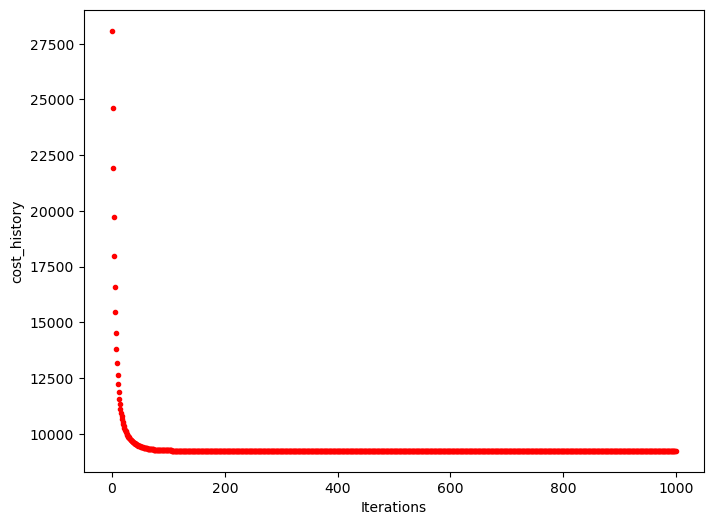

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_ylabel('cost_history')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r.')

# Using standard GD package 

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
regressor = SGDRegressor(alpha=0.05, max_iter=1000, tol=1e-4)
regressor.fit(X_val, y1_2)

# intercept and slopes values
print("Intercept: {:0.3f}, Slope_1: {:0.3f}, Slope_2: {:0.3f}".format(float(regressor.intercept_), float(regressor.coef_[0]), float(regressor.coef_[1])))
# calculation of the final cost function -MSE
y_pred_standard = regressor.predict(X_val)
mse = mean_squared_error(y1_2, y_pred1_2)
print("Final cost (MSE): {:0.3f}".format(mse))

Intercept: 131.168, Slope_1: -33.018, Slope_2: 90.289
Final cost (MSE): 9240.358


C:\Users\MOHIT PRAJAPAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# comparison between standard GD and GD function used before

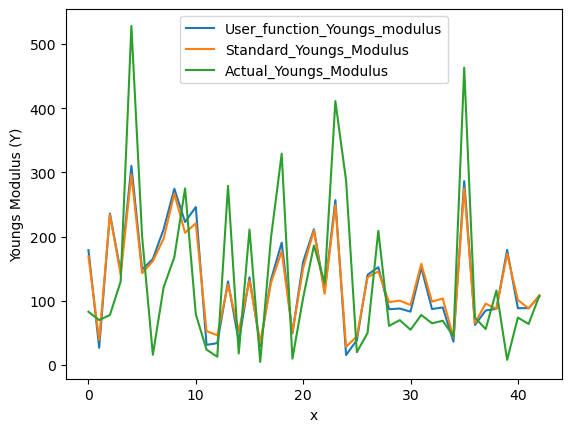

In [20]:
fig, ax = plt.subplots()
ax.plot(y_pred1_2, label='User_function_Youngs_modulus')
ax.plot(y_pred_standard, label='Standard_Youngs_Modulus')
ax.plot(y1_2, label='Actual_Youngs_Modulus')
ax.set_xlabel('x')
ax.set_ylabel('Youngs Modulus (Y)')
ax.legend()
plt.show()
